In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , precision_score ,recall_score ,f1_score ,confusion_matrix
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [3]:
# reading data
df= pd.read_csv("data.csv")

In [4]:
df.head()

,age,income,creditScore,debtincomeratio,fbi,approval
0,55,112593,770,45,"['Smartphones', 'T-shirts', 'Pet food']",1
1,32,174821,719,20,"['Laptops', 'Home decor', 'Bags']",0
2,41,134279,761,58,"['Headphones', 'Coffee makers', 'Jeans']",1
3,46,91065,721,33,"['Gaming consoles', 'Air fryers', 'Hardware']",0
4,58,202347,788,50,"['Blenders', 'Shoes', 'Toys']",1


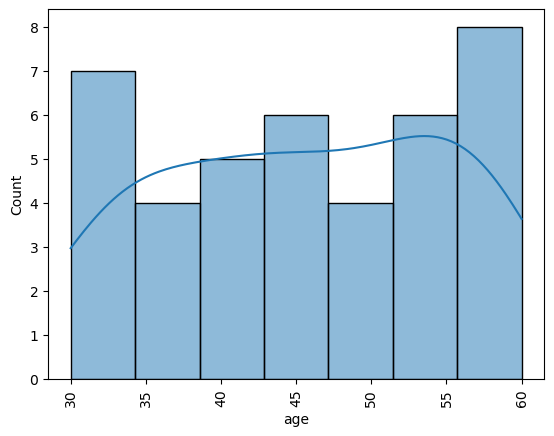

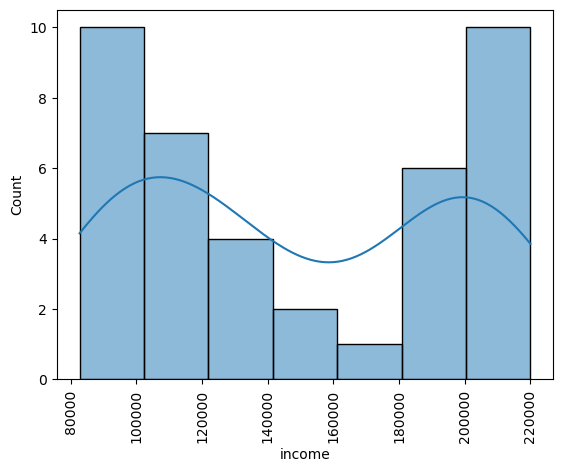

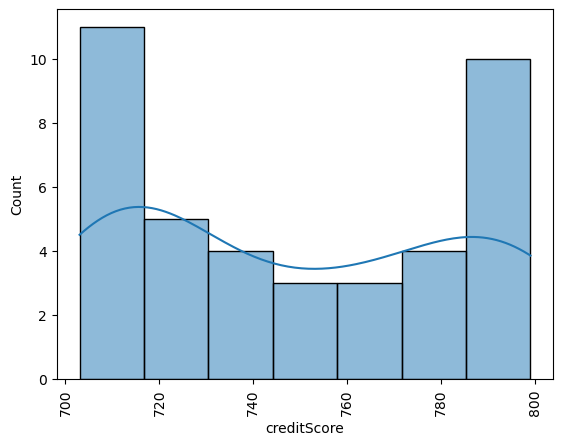

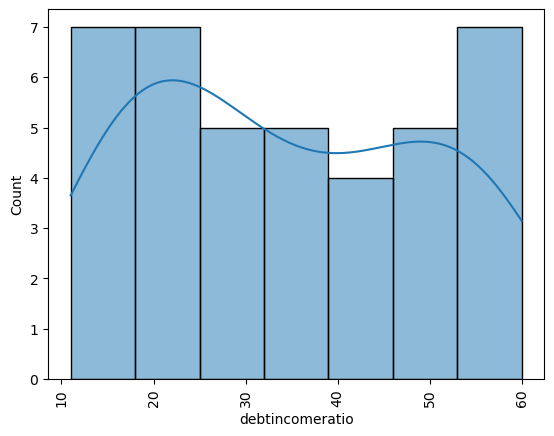

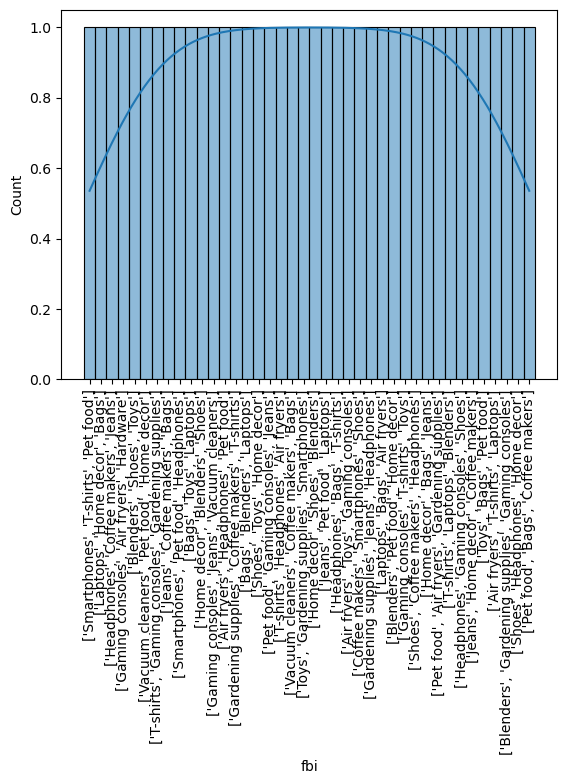

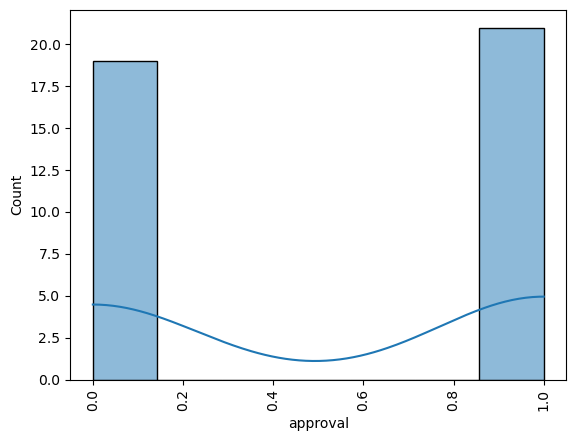

In [5]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.xticks(rotation=90)
    plt.show()

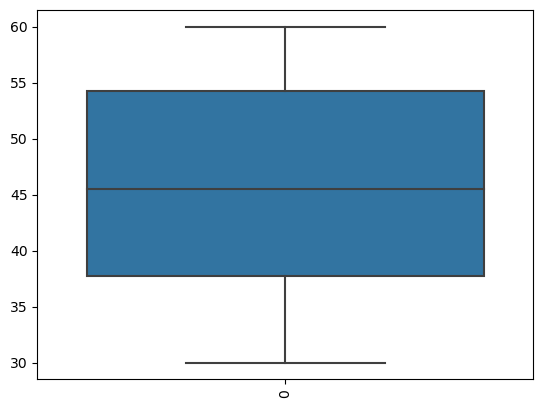

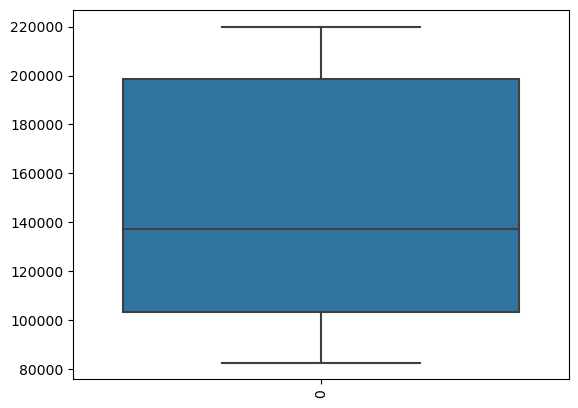

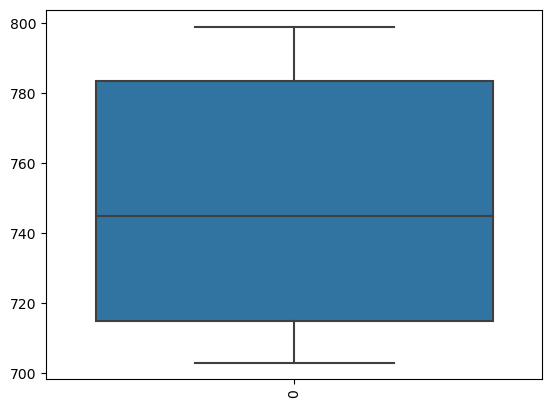

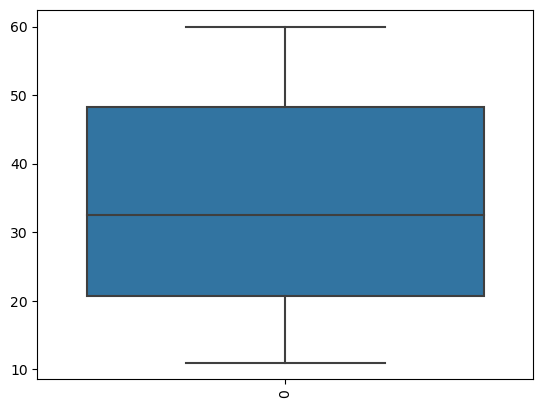

In [6]:
# Checking for outliers
for i in df.columns[:-2]:
    sns.boxplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

### Logistic regression

### Performing logistic regression method on the data to determine the accuracy in if a person is eligible for credit card or not.

In [7]:
x_train,x_test, y_train, y_test = train_test_split(df[["age","income","creditScore","debtincomeratio"]], df["approval"], test_size=0.2, random_state=42)


In [8]:
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((32, 4), (8, 4), (32,), (8,))

In [9]:
scaler=StandardScaler()

In [10]:
model = LogisticRegression()

In [11]:
model.fit(scaler.fit_transform(x_train), y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(scaler.fit_transform(x_test))

In [13]:
accuracy_score(y_test, y_pred) ,f1_score(y_test, y_pred)

(0.5, 0.5)

In [14]:
confusion_matrix(y_test, y_pred)

array([[2, 3],
       [1, 2]])

### Decision Tree

### Performing decision tree method on the data to determine the accuracy in if a person is eligible for credit card or not.

In [15]:
df[["age","income","creditScore","debtincomeratio","approval"]].head()

,age,income,creditScore,debtincomeratio,approval
0,55,112593,770,45,1
1,32,174821,719,20,0
2,41,134279,761,58,1
3,46,91065,721,33,0
4,58,202347,788,50,1


In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(x_test)

In [19]:
accuracy_score(y_test, y_pred)

0.5

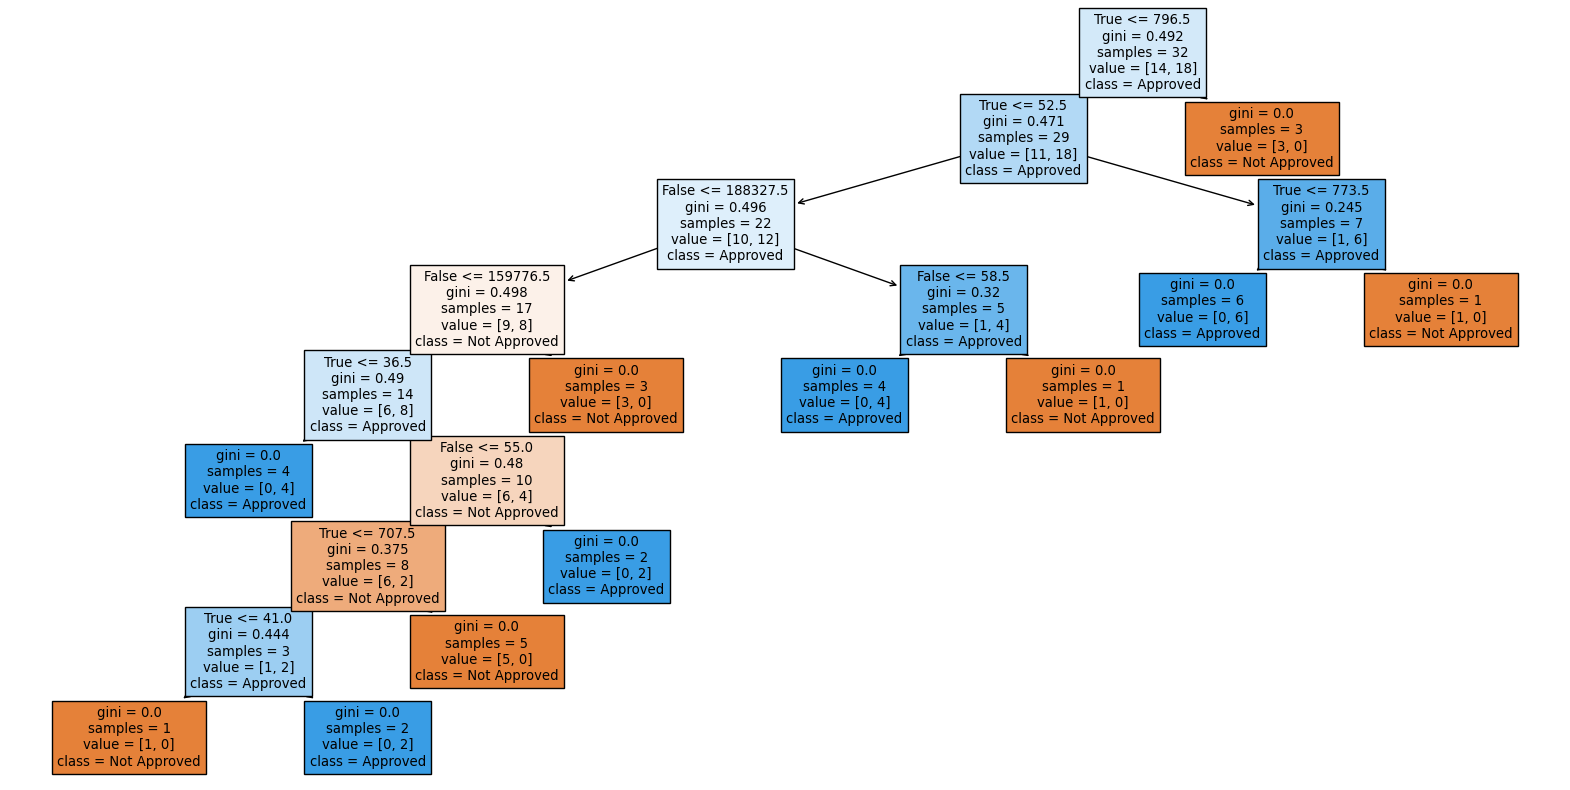

In [20]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(df["approval"].replace({1:True,0:False})), class_names=['Not Approved', 'Approved'], filled=True)
plt.show()

## ARM

### Performing ARM apriori algorithm to find the association among the items bought by customers and providing recommendations to the customer based on the item purchased.

In [21]:
df["fbi"].head()

0          ['Smartphones', 'T-shirts', 'Pet food']
1                ['Laptops', 'Home decor', 'Bags']
2         ['Headphones', 'Coffee makers', 'Jeans']
3    ['Gaming consoles', 'Air fryers', 'Hardware']
4                    ['Blenders', 'Shoes', 'Toys']
Name: fbi, dtype: object

In [22]:
def remove_brackets(s):
    return s.strip("[]")

In [23]:
df['fbi'] = df['fbi'].apply(remove_brackets)

In [24]:
df.head()

,age,income,creditScore,debtincomeratio,fbi,approval
0,55,112593,770,45,"'Smartphones', 'T-shirts', 'Pet food'",1
1,32,174821,719,20,"'Laptops', 'Home decor', 'Bags'",0
2,41,134279,761,58,"'Headphones', 'Coffee makers', 'Jeans'",1
3,46,91065,721,33,"'Gaming consoles', 'Air fryers', 'Hardware'",0
4,58,202347,788,50,"'Blenders', 'Shoes', 'Toys'",1


In [25]:
data = list(df["fbi"].apply(lambda x:x.split(",") ))
data

[["'Smartphones'", " 'T-shirts'", " 'Pet food'"],
 ["'Laptops'", " 'Home decor'", " 'Bags'"],
 ["'Headphones'", " 'Coffee makers'", " 'Jeans'"],
 ["'Gaming consoles'", " 'Air fryers'", " 'Hardware'"],
 ["'Blenders'", " 'Shoes'", " 'Toys'"],
 ["'Vacuum cleaners'", " 'Pet food'", " 'Home decor'"],
 ["'T-shirts'", " 'Gaming consoles'", " 'Gardening supplies'"],
 ["'Jeans'", " 'Coffee makers'", " 'Bags'"],
 ["'Smartphones'", " 'Pet food'", " 'Headphones'"],
 ["'Bags'", " 'Toys'", " 'Laptops'"],
 ["'Home decor'", " 'Blenders'", " 'Shoes'"],
 ["'Gaming consoles'", " 'Jeans'", " 'Vacuum cleaners'"],
 ["'Air fryers'", " 'Headphones'", " 'Pet food'"],
 ["'Gardening supplies'", " 'Coffee makers'", " 'T-shirts'"],
 ["'Bags'", " 'Blenders'", " 'Laptops'"],
 ["'Shoes'", " 'Toys'", " 'Home decor'"],
 ["'Pet food'", " 'Gaming consoles'", " 'Jeans'"],
 ["'T-shirts'", " 'Headphones'", " 'Air fryers'"],
 ["'Vacuum cleaners'", " 'Coffee makers'", " 'Bags'"],
 ["'Toys'", " 'Gardening supplies'", " 'Smartp

In [26]:
encoder = TransactionEncoder()

In [27]:
data = encoder.fit(data).transform(data)

In [28]:
df3 = pd.DataFrame(data,columns=encoder.columns_)

In [29]:
df3

,'Air fryers','Bags','Blenders','Coffee makers','Gaming consoles','Gardening supplies','Hardware','Headphones','Home decor','Jeans',...,'Headphones','Home decor','Jeans','Laptops','Pet food','Shoes','Smartphones','T-shirts','Toys','Vacuum cleaners'
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
frequent_itemsets = apriori(df3, min_support=0.01, use_colnames=True)

In [31]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 'Hardware'),( 'Air fryers'),0.025,0.100,0.025,1.0,10.000000,0.022500,inf,0.923077
1,('Laptops'),( 'Air fryers'),0.050,0.100,0.025,0.5,5.000000,0.020000,1.8,0.842105
2,('Laptops'),( 'Bags'),0.050,0.200,0.050,1.0,5.000000,0.040000,inf,0.842105
3,('Toys'),( 'Bags'),0.050,0.200,0.025,0.5,2.500000,0.015000,1.6,0.631579
4,('Vacuum cleaners'),( 'Bags'),0.050,0.200,0.025,0.5,2.500000,0.015000,1.6,0.631579
...,...,...,...,...,...,...,...,...,...,...
168,"('Blenders', 'Toys')",( 'Shoes'),0.025,0.125,0.025,1.0,8.000000,0.021875,inf,0.897436
169,"( 'Shoes', 'Toys')",('Blenders'),0.025,0.075,0.025,1.0,13.333333,0.023125,inf,0.948718
170,"('Gaming consoles', 'T-shirts')",( 'Toys'),0.025,0.125,0.025,1.0,8.000000,0.021875,inf,0.897436
171,"('Gaming consoles', 'Toys')",( 'T-shirts'),0.025,0.125,0.025,1.0,8.000000,0.021875,inf,0.897436


Results:

Logistic Regression: The logistic regression model achieved an accuracy score of 50% and an F1 score of 0.5 on the test data. The confusion matrix shows that the model correctly classified 2 instances of "not approved" and 2 instances of "approved," but misclassified 3 instances of "not approved" and 1 instance of "approved."

Decision Tree: The decision tree model also achieved an accuracy score of 50% on the test data similar to logistic regression model. Here, the "approval" feature is used to split the tree i.e., based on whether the application was "approved" or "not approved."

Association Rule Mining (ARM): Using the Apriori algorithm, we discovered several association rules among items bought by customers. For example, the rule ('Hardware') -> ('Air fryers') has a support of 0.025, indicating that 2.5% of transactions included both hardware and air fryers. The confidence of 1.0 suggests that if a customer purchases hardware, they are mostly guaranteed to purchase air fryers as well.


Conclusions:

1. Credit Card Eligibility: The logistic regression and decision tree models showed limited success in predicting credit card eligibility based on age, income, credit score, and debt-to-income ratio. Both the models achieved an accuracy of only 50%, indicating that they performed no better than random guessing.

2. Product Recommendations: The association rules generated through ARM provide valuable insights into customer purchasing behavior. By understanding which items are frequently bought together, our amazon store can optimize customer-relevant product advertising, promotions, and cross-selling strategies to increase sales and customer satisfaction.

3. Room for Improvement: Despite the limited success of the models, there is room for improvement through feature engineering, model tuning, and incorporating additional data sources. For example, including more relevant features such as credit history or employment status may improve the predictive performance of the models. Additionally, refining the association rules by considering more transactional data or incorporating temporal patterns could enhance the accuracy of product recommendations.

Overall, while the initial results provide some insights, further refinement and exploration are necessary to develop more robust predictive models and actionable insights for the business.